# Pentose Phosphate Pathway

To construct a model of the pentose phosphate pathway (PPP), first we import <b>masspy</b> and other essential packages. Constants used throughout the notebook are also defined.

In [1]:
from os import path

import matplotlib.pyplot as plt

from cobra import DictList

from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io import json, sbml
from mass.util import qcqa_model

## Model Construction 

The first step of creating a model of the PPP is to define the <font color=#4682B4>MassModel</font>. 

In [2]:
ppp = MassModel("PentosePhosphatePathway")

Academic license - for non-commercial use only


### Metabolites

The next step is to define all of the metabolites using the <font color=#4682B4>MassMetabolite</font> object. Some considerations for this step include the following:

1. It is important to use a clear and consistent format for identifiers and names when defining the <font color=#4682B4>MassMetabolite</font> objects for various reasons, some of which include improvements to model clarity and utility, assurance of unique identifiers (required to add metabolites to the model), and consistency when collaborating and communicating with others. 


2. In order to ensure our model is physiologically accurate, it is important to provide the <font color=#B22222>formula</font> argument with a string representing the chemical formula for each metabolite, and the <font color=#B22222>charge</font> argument with an integer representing the metabolite's ionic charge (Note that neutrally charged metabolites are provided with 0). These attributes can always be set later if necessary using the <font color=#1E90FF>formula</font> and <font color=#1E90FF>charge</font> attribute set methods.


3. To indicate that the cytosol is the cellular compartment in which the reactions occur, the string "c" is provided to the <font color=#B22222>compartment</font> argument.

This model will be created using identifiers and names found in the [BiGG Database](http://bigg.ucsd.edu/).

In this model, there are 17 metabolites inside the cytosol compartment. 

In [3]:
g6p_c = MassMetabolite(
    "g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

_6pgl_c = MassMetabolite(
    "_6pgl_c",
    name="6-Phospho-D-gluco-1,5-lactone",
    formula="C6H9O9P",
    charge=-2,
    compartment="c",
    fixed=False)

_6pgc_c = MassMetabolite(
    "_6pgc_c",
    name="6-Phospho-D-gluconate",
    formula="C6H10O10P",
    charge=-3,
    compartment="c",
    fixed=False)

ru5p__D_c = MassMetabolite(
    "ru5p__D_c",
    name="D-Ribulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

r5p_c = MassMetabolite(
    "r5p_c",
    name="Alpha-D-Ribose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

xu5p__D_c = MassMetabolite(
    "xu5p__D_c",
    name="D-Xylulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

g3p_c = MassMetabolite(
    "g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

s7p_c = MassMetabolite(
    "s7p_c",
    name="Sedoheptulose 7-phosphate",
    formula="C7H13O10P",
    charge=-2,
    compartment="c",
    fixed=False)

f6p_c = MassMetabolite(
    "f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

e4p_c = MassMetabolite(
    "e4p_c",
    name="D-Erythrose 4-phosphate",
    formula="C4H7O7P",
    charge=-2,
    compartment="c",
    fixed=False)

h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c",
    fixed=False)

nadp_c = MassMetabolite(
    "nadp_c",
    name="Nicotinamide adenine dinucleotide phosphate",
    formula="C21H25N7O17P3",
    charge=-3,
    compartment="c",
    fixed=False)

nadph_c = MassMetabolite(
    "nadph_c",
    name="Nicotinamide adenine dinucleotide phosphate - reduced",
    formula="C21H26N7O17P3",
    charge=-4,
    compartment="c",
    fixed=False)

h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c",
    fixed=False)

co2_c = MassMetabolite(
    "co2_c",
    name="CO2",
    formula="CO2",
    charge=0,
    compartment="c",
    fixed=False)

gthox_c = MassMetabolite(
    "gthox_c",
    name="Oxidized glutathione",
    formula="C20H30N6O12S2",
    charge=-2,
    compartment="c",
    fixed=False)

gthrd_c = MassMetabolite(
    "gthrd_c",
    name="Reduced glutathione",
    formula="C10H16N3O6S",
    charge=-1,
    compartment="c",
    fixed=False)

### Reactions

Once all of the <font color=#4682B4>MassMetabolites</font> for each metabolite, the next step is to define all of the reactions that occur and their stoichiometry.

1. As with the metabolites, it is also important to use a clear and consistent format for identifiers and names when defining when defining the <font color=#4682B4>MassReactions</font>.


2. To make this model useful for integration with other models, it is important to provide a string to the <font color=#B22222>subsystem</font> argument. By providing the subsystem, the reactions can be easily obtained even when integrated with a significantly larger model through the <font color=#1E90FF>subsystem</font> attribute


3. After the creation of each <font color=#4682B4>MassReaction</font> object, the metabolites are added to the reaction using a dictionary where keys are the <font color=#4682B4>MassMetabolites</font> and values are the stoichiometric coefficients (reactants have negative coefficients, products have positive ones). 

This model will be created using identifiers and names found in the [BiGG Database](http://bigg.ucsd.edu/).

In this model, there are 10 reactions occuring inside the cytosol compartment.

In [4]:
G6PDH2r = MassReaction(
    "G6PDH2r",
    name="Glucose 6-phosphate dehydrogenase",
    subsystem=ppp.id,
    reversible=True)
G6PDH2r.add_metabolites({
    g6p_c: -1,
    nadp_c: -1,
    _6pgl_c: 1,
    nadph_c: 1,
    h_c: 1})

PGL = MassReaction(
    "PGL",
    name="6-phosphogluconolactonase",
    subsystem=ppp.id,
    reversible=True)
PGL.add_metabolites({
    _6pgl_c: -1,
    h2o_c: -1,
    _6pgc_c: 1,
    h_c: 1})

GND = MassReaction(
    "GND",
    name="Phosphogluconate dehydrogenase",
    subsystem=ppp.id,
    reversible=True)
GND.add_metabolites({
    _6pgc_c: -1,
    nadp_c: -1,
    nadph_c: 1,
    co2_c: 1,
    ru5p__D_c: 1})

RPI = MassReaction(
    "RPI",
    name="Ribulose 5-Phosphate Isomerase",
    subsystem=ppp.id,
    reversible=True)
RPI.add_metabolites({
    ru5p__D_c: -1,
    r5p_c: 1})

RPE = MassReaction(
    "RPE",
    name="Ribulose 5-phosphate 3-epimerase",
    subsystem=ppp.id,
    reversible=True)
RPE.add_metabolites({
    ru5p__D_c: -1,
    xu5p__D_c: 1})

TKT1 = MassReaction(
    "TKT1",
    name="Transketolase",
    subsystem=ppp.id,
    reversible=True)
TKT1.add_metabolites({
    r5p_c: -1,
    xu5p__D_c: -1,
    g3p_c: 1,
    s7p_c: 1})

TALA = MassReaction(
    "TALA",
    name="Transaldolase",
    subsystem=ppp.id,
    reversible=True)
TALA.add_metabolites({
    g3p_c: -1,
    s7p_c: -1,
    e4p_c: 1,
    f6p_c: 1})

TKT2 = MassReaction(
    "TKT2",
    name="Transketolase",
    subsystem=ppp.id,
    reversible=True)
TKT2.add_metabolites({
    e4p_c: -1,
    xu5p__D_c: -1,
    f6p_c: 1,
    g3p_c: 1})

GTHOr = MassReaction(
    "GTHOr",
    name="Glutathione oxidoreductase",
    subsystem="Misc.",
    reversible=True)
GTHOr.add_metabolites({
    gthox_c: -1,
    h_c: -1,
    nadph_c: -1,
    gthrd_c: 2,
    nadp_c: 1})

GSHR = MassReaction(
    "GSHR",
    name="Glutathione-disulfide reductase",
    subsystem="Misc.",
    reversible=True)
GSHR.add_metabolites({
    gthrd_c: -2,
    gthox_c: 1,
    h_c: 2})

After generating the reactions, all reactions are added to the model through the <font color=#4682B4>MassModel</font><font color=#00008B>.add_reactions</font> class method. Adding the <font color=#4682B4>MassReactions</font> will also add their associated <font color=#4682B4>MassMetabolites</font> if they have not already been added to the model. 

In [5]:
ppp.add_reactions([
    G6PDH2r, PGL, GND, RPI, RPE, TKT1, TALA, TKT2, GTHOr, GSHR])

for reaction in ppp.reactions:
    print(reaction)

G6PDH2r: g6p_c + nadp_c <=> _6pgl_c + h_c + nadph_c
PGL: _6pgl_c + h2o_c <=> _6pgc_c + h_c
GND: _6pgc_c + nadp_c <=> co2_c + nadph_c + ru5p__D_c
RPI: ru5p__D_c <=> r5p_c
RPE: ru5p__D_c <=> xu5p__D_c
TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c
TALA: g3p_c + s7p_c <=> e4p_c + f6p_c
TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c
GTHOr: gthox_c + h_c + nadph_c <=> 2 gthrd_c + nadp_c
GSHR: 2 gthrd_c <=> gthox_c + 2 h_c


### Boundary reactions

After generating the reactions, the next step is to add the boundary reactions and boundary conditions (the concentrations of the boundary 'metabolites' of the system). This can easily be done using the <font color=#4682B4>MassModel</font><font color=#00008B>.add_boundary</font> method. With the generation of the boundary reactions, the system becomes an open system, allowing for the flow of mass through the biochemical pathways of the model.

Once added, the model will be able to return the boundary conditions as a dictionary through the <font color=#4682B4>MassModel</font><font color=#1E90FF>.boundary_conditions</font> attribute 

In this model, there are 7 boundary reactions that must be defined.

All boundary reactions are originally created with the metabolite as the reactant. However, there are times where it would be preferable to represent the metabolite as the product. For these situtations, the <font color=#4682B4>MassReaction</font><font color=#1E90FF>.reverse_stoichiometry</font> method can be used with its <font color=#B22222>inplace</font> argument to create a new <font color=#4682B4>MassReaction</font> or simply reverse the stoichiometry for the current <font color=#4682B4>MassReaction.</font> 

In [6]:
DM_f6p_c = ppp.add_boundary(
    metabolite=f6p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

DM_r5p_c = ppp.add_boundary(
    metabolite=r5p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

DM_g3p_c = ppp.add_boundary(
    metabolite=g3p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_g6p_c = ppp.add_boundary(
    metabolite=g6p_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_g6p_c.reverse_stoichiometry(inplace=True)

SK_h_c = ppp.add_boundary(
    metabolite=h_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=6.30957e-05)

SK_h2o_c = ppp.add_boundary(
    metabolite=h2o_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_co2_c = ppp.add_boundary(
    metabolite=co2_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

print("Boundary Reactions and Values\n-----------------------------")
for reaction in ppp.boundary:
    boundary_met = reaction.boundary_metabolite
    bc_value = ppp.boundary_conditions.get(boundary_met)
    print("{0}\n{1}: {2}\n".format(
        reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
DM_f6p_c: f6p_c --> 
f6p_b: 1.0

DM_r5p_c: r5p_c --> 
r5p_b: 1.0

DM_g3p_c: g3p_c --> 
g3p_b: 1.0

SK_g6p_c:  <=> g6p_c
g6p_b: 1.0

SK_h_c: h_c <=> 
h_b: 6.30957e-05

SK_h2o_c: h2o_c <=> 
h2o_b: 1.0

SK_co2_c: co2_c <=> 
co2_b: 1.0



### Optional: Ordering of internal species and reactions

Sometimes, it is also desirable to reorder the metabolite and reaction objects inside the model to follow the physiology. To reorder the internal species, one can use <font color=#008000>cobra</font><font color=#556B2F>.DictLists</font> and the <font color=#556B2F>DictList</font><font color=#006400>.get_by_any</font> with the list of metabolite identifiers in the desirable order. To ensure all metabolites are still present and not forgotten in the model, a small QA check is also performed. 

In [7]:
new_metabolite_order = [
    "f6p_c", "g6p_c", "g3p_c", "_6pgl_c", "_6pgc_c",
    "ru5p__D_c", "xu5p__D_c", "r5p_c", "s7p_c", "e4p_c",
    "nadp_c", "nadph_c", "gthrd_c", "gthox_c", "co2_c",
    "h_c", "h2o_c"]

if len(ppp.metabolites) == len(new_metabolite_order):
    ppp.metabolites = DictList(
        ppp.metabolites.get_by_any(new_metabolite_order))
    
new_reaction_order = [
    "G6PDH2r", "PGL", "GND", "RPE", "RPI",
    "TKT1", "TKT2", "TALA", "GTHOr", "GSHR",
    "SK_g6p_c", "DM_f6p_c", "DM_g3p_c","DM_r5p_c", 
    "SK_co2_c", "SK_h_c", "SK_h2o_c"]

if len(ppp.reactions) == len(new_reaction_order):
    ppp.reactions = DictList(
        ppp.reactions.get_by_any(new_reaction_order))
    
ppp.update_S(array_type="DataFrame", dtype=int)

,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,SK_g6p_c,DM_f6p_c,DM_g3p_c,DM_r5p_c,SK_co2_c,SK_h_c,SK_h2o_c
f6p_c,0,0,0,0,0,0,1,1,0,0,0,-1,0,0,0,0,0
g6p_c,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
g3p_c,0,0,0,0,0,1,1,-1,0,0,0,0,-1,0,0,0,0
_6pgl_c,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
_6pgc_c,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ru5p__D_c,0,0,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0
xu5p__D_c,0,0,0,1,0,-1,-1,0,0,0,0,0,0,0,0,0,0
r5p_c,0,0,0,0,1,-1,0,0,0,0,0,0,0,-1,0,0,0
s7p_c,0,0,0,0,0,1,0,-1,0,0,0,0,0,0,0,0,0
e4p_c,0,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0


## Model Parameterization
### Steady State fluxes
Steady state fluxes can be computed as a summation of the MinSpan pathway vectors. 

Pathways are obtained using the minspan package (https://github.com/SBRG/minspan). 

Using these pathways and literature sources, independent fluxes can be defined in order to calculate the steady state flux vector. 

For this model, the flux of glucose-6-phosphate uptake is fixed at 0.21 mM/hr, and the flux of Alpha-D-Ribose 5-phosphate uptake is fixed at 0.01 mM/hr. The former value represents a typical flux through the pentose pathway while the latter will couple at a low flux level to the AMP pathways 

With these pathays and numerical values, the steady state flux vector can be computed as the weighted sum of the corresponding basis vectors. The steady state flux vector is computed as an inner product:

In [8]:
minspan_paths = [
    [1, 1, 1, 2/3, 1/3, 1/3, 1/3, 1/3, 2, 2, 1, 2/3, 1/3, 0, 1, 4, -1],
    [1, 1, 1,  0,   1,   0,   0,   0,  2, 2, 1,  0,   0,  1, 1, 4, -1]]
ppp.compute_steady_state_fluxes(
    pathways=minspan_paths,
    independent_fluxes={
        SK_g6p_c: 0.21,
        DM_r5p_c: 0.01},
    update_reactions=True)

print("Steady State Fluxes\n-------------------")
for reaction, steady_state_flux in ppp.steady_state_fluxes.items():
    print("{0}: {1:.6f}".format(reaction.flux_symbol_str, steady_state_flux))

Steady State Fluxes
-------------------
v_G6PDH2r: 0.210000
v_PGL: 0.210000
v_GND: 0.210000
v_RPE: 0.133333
v_RPI: 0.076667
v_TKT1: 0.066667
v_TKT2: 0.066667
v_TALA: 0.066667
v_GTHOr: 0.420000
v_GSHR: 0.420000
v_SK_g6p_c: 0.210000
v_DM_f6p_c: 0.133333
v_DM_g3p_c: 0.066667
v_DM_r5p_c: 0.010000
v_SK_co2_c: 0.210000
v_SK_h_c: 0.840000
v_SK_h2o_c: -0.210000


### Initial Conditions

Once the network has been built, the concentrations can be added to the metabolites. These concentrations are also treated as the initial conditions required to integrate and simulate the model's ordinary differential equations (ODEs). The metabolite concentrations are added to each individual metabolite using the <font color=#4682B4>MassMetabolite</font><font color=#1E90FF>.initial_condition</font> (shorthand: <font color=#4682B4>MassMetabolite</font><font color=#1E90FF>.ic</font>) attribute setter methods. Once added, the model will be able to return the initial conditions as a dictionary through the <font color=#4682B4>MassModel</font><font color=#1E90FF>.initial_conditions</font> attribute.

In [9]:
g6p_c.ic = 0.0486
f6p_c.ic = 0.0198
g3p_c.ic = 0.00728
_6pgl_c.ic = 0.00175424
_6pgc_c.ic = 0.0374753
ru5p__D_c.ic = 0.00493679
xu5p__D_c.ic = 0.0147842
r5p_c.ic = 0.0126689
s7p_c.ic = 0.023988
e4p_c.ic = 0.00507507
nadp_c.ic = 0.0002
nadph_c.ic = 0.0658
gthrd_c.ic = 3.2
gthox_c.ic = 0.12
co2_c.ic = 1
h_c.ic = 0.0000714957
h2o_c.ic = 1

print("Initial Conditions\n------------------")
for metabolite, ic_value in ppp.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

Initial Conditions
------------------
f6p_c: 0.0198
g6p_c: 0.0486
g3p_c: 0.00728
_6pgl_c: 0.00175424
_6pgc_c: 0.0374753
ru5p__D_c: 0.00493679
xu5p__D_c: 0.0147842
r5p_c: 0.0126689
s7p_c: 0.023988
e4p_c: 0.00507507
nadp_c: 0.0002
nadph_c: 0.0658
gthrd_c: 3.2
gthox_c: 0.12
co2_c: 1
h_c: 7.14957e-05
h2o_c: 1


### Equilibirum Constants

After adding initial conditions and steady state fluxes, the equilibrium constants are defined using the <font color=#4682B4>MassReaction</font><font color=#1E90FF>.equilibrium_constant</font> (shorthand: <font color=#4682B4>MassReaction</font><font color=#1E90FF>.Keq</font>) setter method. 

In [10]:
G6PDH2r.Keq = 1000
PGL.Keq = 1000
GND.Keq = 1000
RPE.Keq = 3
RPI.Keq = 2.57
TKT1.Keq = 1.2
TKT2.Keq = 10.3
TALA.Keq = 1.05
GTHOr.Keq = 100
GSHR.Keq = 2

SK_g6p_c.Keq = 1
SK_h_c.Keq = 1
SK_h2o_c.Keq = 1
SK_co2_c.Keq = 1

print("Equilibrium Constants\n---------------------")
for reaction in ppp.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_G6PDH2r: 1000
Keq_PGL: 1000
Keq_GND: 1000
Keq_RPE: 3
Keq_RPI: 2.57
Keq_TKT1: 1.2
Keq_TKT2: 10.3
Keq_TALA: 1.05
Keq_GTHOr: 100
Keq_GSHR: 2
Keq_SK_g6p_c: 1
Keq_DM_f6p_c: inf
Keq_DM_g3p_c: inf
Keq_DM_r5p_c: inf
Keq_SK_co2_c: 1
Keq_SK_h_c: 1
Keq_SK_h2o_c: 1


### Calculation of PERCs
By defining the equilibrium constant and steady state parameters, the values of the pseudo rate constants (PERCs) can be calculated and added to the model using the <font color=#4682B4>MassModel</font><font color=#00008B>.calculate_PERCs</font> method.

From literature, it is known that the rate of the phosphate uptake is 0.26/hr. Therefore, the PERC for the phosphate exchange is updated manually using the <font color=#4682B4>MassReaction</font><font color=#1E90FF>.forward_rate_constant</font> (shorthand: <font color=#4682B4>MassReaction</font><font color=#1E90FF>.kf</font>) setter method:

In [11]:
ppp.calculate_PERCs(update_reactions=True)

print("Forward Rate Constants\n----------------------")
for reaction in ppp.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

Forward Rate Constants
----------------------
kf_G6PDH2r: 21864.589249
kf_PGL: 122.323112
kf_GND: 29287.807474
kf_RPE: 15284.677111
kf_RPI: 10564.620051
kf_TKT1: 1595.951975
kf_TKT2: 1092.246435
kf_TALA: 844.616138
kf_GTHOr: 53.329812
kf_GSHR: 0.041257
kf_SK_g6p_c: 0.220727
kf_DM_f6p_c: 6.734007
kf_DM_g3p_c: 9.157509
kf_DM_r5p_c: 0.789335
kf_SK_co2_c: 100000.000000
kf_SK_h_c: 100000.000000
kf_SK_h2o_c: 100000.000000


## QC/QA Model

Before simulating the model, it is important to ensure that the model is elementally balanced, and that the model can simulate. Therefore, the <font color=#00008B>qcqa_model</font> function from the <font color=#0000FF>mass.util.qcqa</font></td> submodule is used to provide a report on the model quality and indicate whether simulation is possible and if not, what parameters and/or initial conditions are missing. 

Generally, pseudoreactions (e.g. boundary exchanges, sinks, demands) are not elementally balanced. The <font color=#00008B>qcqa_model</font> function does not include elemental balancing of boundary reactions. 

However, some models contain pseudoreactions reprsenting a simplified mechanism, and show up in the returned report. The elemental imbalance of these pseudoreactions is therefore expected in certain reaction and should not be a cause for concern. 

In this model of the PPP, the GSHR reaction is a simplified pseudoreaction that represents oxidative stress due to gluthathione and is not expected to be balanced.

In [12]:
qcqa_model(ppp, parameters=True, concentrations=True, 
           fluxes=True, superfluous=True, elemental=True)

╒══════════════════════════════════════════════╕
│ MODEL ID: PentosePhosphatePathway            │
│ SIMULATABLE: True;                           │
│ NUMERICALLY CONSISTENT: True                 │
╞══════════════════════════════════════════════╡
│ ============================================ │
│             CONSISTENCY CHECKS               │
│ ============================================ │
│ Elemental                                    │
│ ------------------------------               │
│ GSHR: {charge: 2.0} unbalanced               │
│ ============================================ │
╘══════════════════════════════════════════════╛


From the results of the QC/QA test, it can be seen that the model can be simulated and is numerically consistent.

## Steady State and Model Validation 

To find the steady state of the model and perform simulations, the model must first be loaded into a <font color=#4682B4>Simulation</font>. In order to load a model into a <font color=#4682B4>Simulation</font>, the model must be simulatable, meaning there are no missing numerical values that would prevent the integration of the ODEs that comprise the model. The <font color=#B22222>verbose</font> argument can be used while loading a model to produce a message indicating the successful loading of a model, or why a model could not load.

Once loaded into a <font color=#4682B4>Simulation</font>, the <font color=#00008B>find_steady_state</font> method can be used with the <font color=#B22222>update_values</font> argument in order to update the initial conditions and fluxes of the model to a steady state (if necessary). The model can be simulated using the <font color=#00008B>simulate</font> method by passing the model to simulate, and a tuple containing the start time and the end time. The number of time points can also be included, but is optional.

After a successful simulation, two <font color=#008000>cobra</font><font color=#556B2F>.DictLists</font> are returned. The first <font color=#556B2F>DictList</font> holds a <font color=#4682B4>MassSolution</font> that contains the concentration results of the simulation, and the second <font color=#556B2F>DictList</font> hold a <font color=#4682B4>MassSolution</font> that contains the flux results of the simulation. Note that there will always be two <font color=#4682B4>MassSolutions</font> generated per model simulated.

To visually validate the steady state of the model, concentration and flux solutions can be plotted using the <font color=#00008B>plot_time_profile</font> function from <font color=#0000FF>mass.visualization</font></td>. Alternatively, the <font color=#4682B4>MassSolution</font><font color=#1E90FF>.view_time_profile</font> property can be used to quickly generate a time profile for the results.

Successfully loaded MassModel 'PentosePhosphatePathway' into RoadRunner.


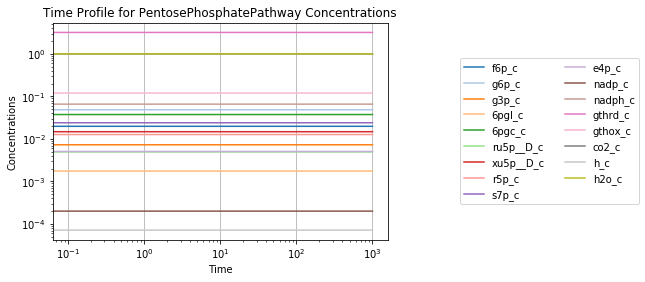

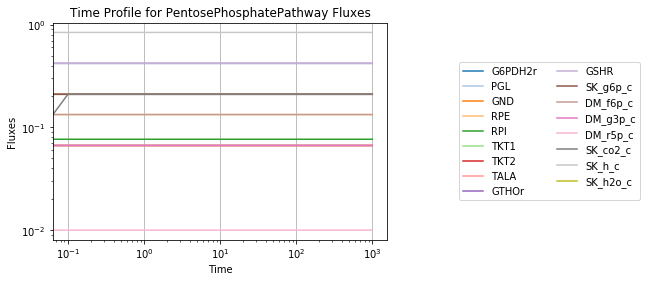

In [13]:
# Setup simulation object
sim = Simulation(ppp, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol_list, flux_sol_list = sim.simulate(ppp, time=(0, 1e3, 1e4 + 1))
conc_sol, flux_sol = conc_sol_list[0], flux_sol_list[0]
# Quickly render and display time profiles 
for sol in [conc_sol, flux_sol]:
    sol.view_time_profile
    plt.show()

### Optional: Storing information and references
#### Compartment
Because the character "c" represents the cytosol compartment, it is recommended to define and set the compartment in the <font color=#4682B4>MassModel</font><font color=#1E90FF>.compartments</font> attribute.

In [14]:
ppp.compartments = {"c": "Cytosol"}
print(ppp.compartments)

{'c': 'Cytosol'}


#### Units
All of the units for the numerical values used in this model are "Millimoles" for amount and "Liters" for volume (giving a concentration unit of 'Millimolar'), and "Hours" for time. In order to ensure that future users understand the numerical values for model, it is important to define the <font color=#4682B4>MassModel</font><font color=#1E90FF>.units</font> attribute.

The <font color=#4682B4>MassModel</font><font color=#1E90FF>.units</font> is a <font color=#008000>cobra</font><font color=#556B2F>.DictList</font> that contains only <font color=#4682B4>UnitDefinition</font> objects from the <font color=#0000FF>mass.core.unit</font> submodule. 

Each <font color=#4682B4>UnitDefinition</font> is created from <font color=#4682B4>Unit</font> objects representing the base units that comprise the <font color=#4682B4>UnitDefinition</font>. These <font color=#4682B4>Units</font> are stored in the <font color=#1E90FF>list_of_units</font> attribute. Pre-built units can be viewed using the <font color=#00008B>print_defined_unit_values</font> function from the <font color=#0000FF>mass.core.unit</font></td> submodule. Alternatively, custom units can also be created using the <font color=#4682B4>UnitDefinition</font><font color=#00008B>.create_unit</font> function.

For more information about units, please see the module docstring for <font color=#0000FF>mass.core.unit</font> submodule.

__Note:__ It is important to note that this attribute will NOT track units, but instead acts as a reference for the user and others so that they can perform necessary unit conversions.

In [15]:
# Using pre-build units to define UnitDefinitions
concentration = UnitDefinition("mM", name="Millimolar", list_of_units=["millimole", "per_litre"])
time = UnitDefinition("hr", name="Hour", list_of_units=["hour"])

# Add units to model
ppp.add_units([concentration, time])
print(ppp.units)

[<UnitDefinition Millimolar "mM" at 0x1249eb198>, <UnitDefinition Hour "hr" at 0x1249eb940>]


## Export

After validation, the model is ready to be saved. The model can either be exported as a ".json" file or as an ".sbml" (".xml") file using their repsective submodules in <font color=#0000FF>mass.io</font></td>.

To export the model, only the path to the directory and the name of the model need to be specified. Both are shown below. 

In [16]:
filepath = path.realpath(path.join("models", ppp.id))

### Export using JSON

In [17]:
json.save_json_model(mass_model=ppp, filename=filepath + ".json")

### Export using SBML

In [18]:
sbml.write_sbml_model(mass_model=ppp, filename=filepath + ".xml")